In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [3]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-1.414864,1.223659,3.065955,-0.139610,1.724426,1
1,0.902079,2.142168,1.778516,-2.603982,1.563474,1
2,-0.355812,0.560938,2.575889,-1.805688,2.593192,1
3,-1.751900,0.141748,0.072018,-0.397537,0.774910,1
4,-0.698213,-0.963132,-0.310776,1.684528,0.785576,0


In [4]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [5]:
import random
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [6]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [7]:
df1 = combined_sampling(df,0.5,0.5)

C:\Users\acer\AppData\Local\Temp\ipykernel_1724\4042980177.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [8]:
df2 = combined_sampling(df,0.5,0.5)

C:\Users\acer\AppData\Local\Temp\ipykernel_1724\4042980177.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [9]:
df3 = combined_sampling(df,0.5,0.5)

C:\Users\acer\AppData\Local\Temp\ipykernel_1724\4042980177.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [10]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col2', 'col1', 'target'], dtype='object')
Index(['col2', 'col4', 'target'], dtype='object')
Index(['col5', 'col1', 'target'], dtype='object')


In [11]:
df3

,col5,col1,target
48,1.517857,0.776585,0
44,-0.382618,-2.771592,1
99,-0.934509,-1.779010,0
19,0.537911,-1.937768,1
32,1.280525,-0.192374,0
56,0.168236,-1.988132,0
51,1.756590,-0.201428,0
45,1.510832,-1.446687,0
49,0.559492,-1.585038,0
43,-0.319430,0.279614,1


In [12]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [13]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [14]:
from sklearn.tree import plot_tree

[Text(0.36363636363636365, 0.9375, 'x[0] <= -1.113\ngini = 0.435\nsamples = 50\nvalue = [16, 34]'),
 Text(0.2727272727272727, 0.8125, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.45454545454545453, 0.8125, 'x[1] <= -1.069\ngini = 0.283\nsamples = 41\nvalue = [7.0, 34.0]'),
 Text(0.2727272727272727, 0.6875, 'x[1] <= -2.098\ngini = 0.142\nsamples = 26\nvalue = [2, 24]'),
 Text(0.18181818181818182, 0.5625, 'x[1] <= -2.322\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.09090909090909091, 0.4375, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.2727272727272727, 0.4375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.36363636363636365, 0.5625, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(0.6363636363636364, 0.6875, 'x[1] <= -0.716\ngini = 0.444\nsamples = 15\nvalue = [5, 10]'),
 Text(0.5454545454545454, 0.5625, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7272727272727273, 0.5625, 'x[0] <= 0.824\ngini = 0.278\nsamples = 12\nvalue = [2, 10]'),
 Text(0.63636

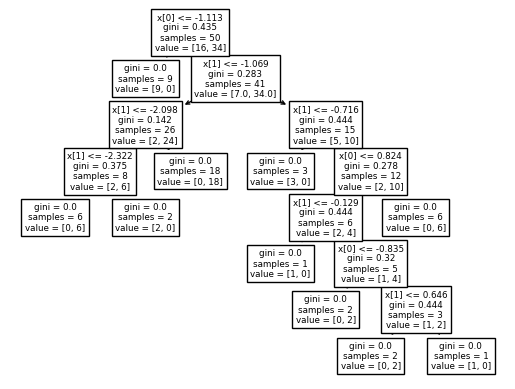

In [15]:
plot_tree(clf1)

[Text(0.4583333333333333, 0.9285714285714286, 'x[1] <= -0.328\ngini = 0.5\nsamples = 50\nvalue = [25, 25]'),
 Text(0.375, 0.7857142857142857, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(0.5416666666666666, 0.7857142857142857, 'x[0] <= -1.179\ngini = 0.342\nsamples = 32\nvalue = [25, 7]'),
 Text(0.4583333333333333, 0.6428571428571429, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(0.625, 0.6428571428571429, 'x[1] <= 0.901\ngini = 0.492\nsamples = 16\nvalue = [9, 7]'),
 Text(0.4166666666666667, 0.5, 'x[1] <= 0.005\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.25, 0.35714285714285715, 'x[1] <= -0.255\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.16666666666666666, 0.21428571428571427, 'x[1] <= -0.316\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.08333333333333333, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.25, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333333333333, 0.21428571428571427, 'gin

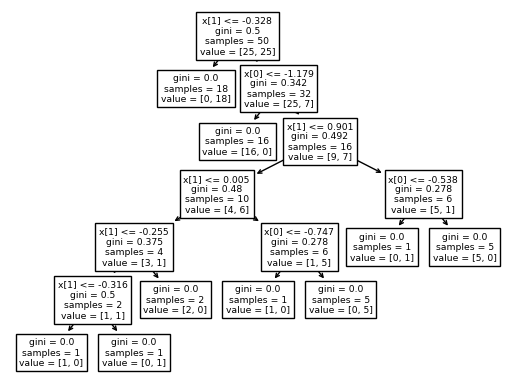

In [16]:
plot_tree(clf2)

[Text(0.38333333333333336, 0.9375, 'x[1] <= -1.719\ngini = 0.461\nsamples = 50\nvalue = [32, 18]'),
 Text(0.2, 0.8125, 'x[0] <= 0.176\ngini = 0.49\nsamples = 14\nvalue = [6, 8]'),
 Text(0.13333333333333333, 0.6875, 'x[1] <= -2.715\ngini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(0.06666666666666667, 0.5625, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.2, 0.5625, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.26666666666666666, 0.6875, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.5666666666666667, 0.8125, 'x[1] <= 0.012\ngini = 0.401\nsamples = 36\nvalue = [26, 10]'),
 Text(0.4, 0.6875, 'x[0] <= 1.075\ngini = 0.236\nsamples = 22\nvalue = [19, 3]'),
 Text(0.3333333333333333, 0.5625, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.4666666666666667, 0.5625, 'x[0] <= 1.223\ngini = 0.375\nsamples = 12\nvalue = [9, 3]'),
 Text(0.4, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5333333333333333, 0.4375, 'x[0] <= 2.392\ngini = 0.298\nsamples = 11\nvalue

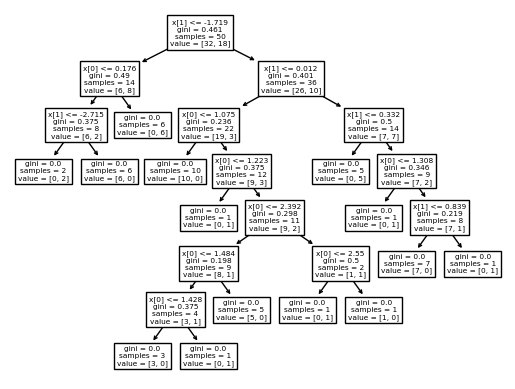

In [17]:
plot_tree(clf3)

In [18]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

D:\ML\my_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [19]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

D:\ML\my_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [20]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

D:\ML\my_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [21]:
df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
30,-1.273320,0.729200,1.092654,-1.091710,1.777790,1
3,-1.751900,0.141748,0.072018,-0.397537,0.774910,1
93,-2.656834,1.857524,-0.181709,0.443970,-1.341828,1
14,-2.757150,0.448055,-2.502470,0.158070,-1.699916,1
85,-0.022330,0.213458,0.389206,-0.325059,2.776254,0
89,0.003546,-1.311417,-1.659354,1.243471,0.823843,0
19,-1.937768,0.751246,0.592209,0.347361,0.537911,1
24,-0.528183,0.784421,0.953614,-0.121115,2.841876,0
6,-0.583450,-1.267406,-1.105979,1.449831,1.498095,0
65,-2.051077,2.058990,-0.866918,0.004189,-1.021303,1
